# Draw

In [8]:
from mocml import config, data, model

import os
num_thread = config.num_thread
os.environ['OMP_NUM_THREADS'] = str(num_thread)
os.environ['OPENBLAS_NUM_THREADS'] = str(num_thread)

import re
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

d, m  = data.Data(), model.Model()

def annotate_heatmap_(im, num):
    acc = im.get_array()
    threshold = im.norm(acc.max())/2.
    textcolors=('black', 'white')
    kw = dict(
        horizontalalignment='center',
        verticalalignment='center'
    )
    
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            kw.update(color=textcolors[int(im.norm(acc[i, j]) > threshold)])
            text_num = im.axes.text(j, i, '%d' % num[i, j], fontsize=32, va='baseline', **kw)
            text_acc = im.axes.text(j, i+0.25, '%.2f' % acc[i, j], fontsize=22, **kw)
            
def ShowConfs(path_train, path_test, verbose='f'):
    plt.rcParams.update({'font.size': 35})
    fig, axes = plt.subplots(1, 4, figsize=(18, 5), constrained_layout=True)
    
    labels = ['A', 'C', 'G']
    mc_list = ['rf', 'xgb', 'lgbm', 'cat']
    title_list = ['(a)RF', '(b)XGB', '(c)LGBM', '(d)CAT']
    
    show_yticks = True
    xpad = -0.4
    
    for ax, mc, title in zip(axes, mc_list, title_list):
        y_test, y_pred = m.Predict(path_train, path_test, mc, verbose=verbose)
        
        num = confusion_matrix(y_test, y_pred, labels=labels)
        acc = [num[i, :] / num[i, :].sum() for i in range(3)]
        norm = plt.Normalize(0, 1)
        
        im = ax.imshow(acc, cmap='Greens', norm=norm)
        annotate_heatmap_(im, num)
        
        ax.set_title(title, ha='left', x=xpad, y=1.1)
        ax.set_xticks(range(len(labels)), labels=labels)
        ax.set_yticks(range(len(labels)), labels=labels)
        ax.set_ylabel('\nTrue', fontsize='large')
        
        if not show_yticks:
            ax.set_yticklabels([])
            ax.set_ylabel('')
            
        show_yticks = False
        xpad = -0.1
            
    cb = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.75, pad=0.02)
    cb.set_ticks([0, 1])
    
    fig.supxlabel('Predicted', fontsize='large', y=-0.12)
    fig.get_layout_engine().set(wspace=0.1)
    fig.savefig('figs/confs_%s.png' % ('_'.join([re.sub('.csv', '', re.sub('/', '_', fn)) for fn in [path_train, path_test]])))
    plt.show()
    
def ShowAcc(path_train, mc, verbose='f'):
    plt.rcParams.update({'font.size': 35})
    fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
    
    labels = ['A', 'C', 'G']
    eta0 = float(re.sub('eta', '', re.search('eta\d+[.]\d+', path_train).group()))
    eta_range = np.arange(0.1, 0.31, 0.02)
    acc = [[] for _ in labels]
    
    for eta in eta_range:
        if np.abs(eta0 - eta) < 1e-6: path_test = 'none'
        else: path_test = re.sub('eta\d+[.]\d+', 'eta%.2f' % eta, path_train)
            
        y_test, y_pred = m.Predict(path_train, path_test, mc, verbose=verbose)
        cm = confusion_matrix(y_test, y_pred)
        for i, cmi in enumerate(cm):
            acc[i].append(cmi[i] / cmi.sum())
    
    for a in acc: ax.plot(eta_range, a, ls='.-')
        
    fig.savefig('figs/acc_%s.png' % (re.sub('.csv', '', re.sub('/', '_', path_train))))
    plt.show()

Predict(rf) : 1.738481s
[[ 617    0    0]
 [   3 1557   13]
 [   0   24 1661]]
[[1.0], [0.9898283534647171], [0.9857566765578635]]


FileNotFoundError: [Errno 2] No such file or directory: 'data/hf/dos_n_Ne128_eta0.12_m0.10.csv'

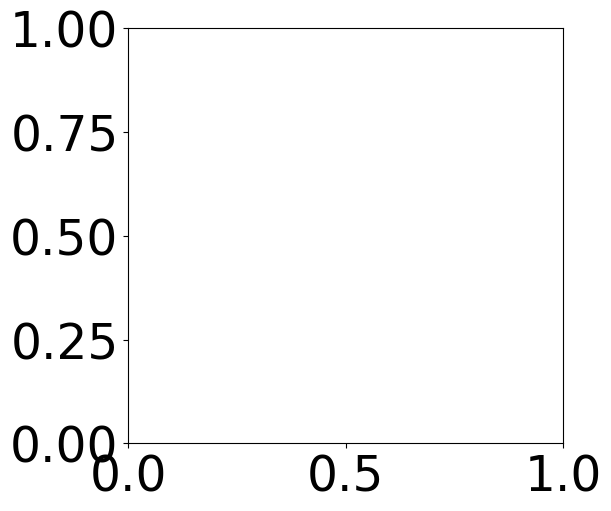

In [7]:
ShowAcc('data/hf/dos_n_Ne128_eta0.10_m0.10.csv', 'rf')

## DOS

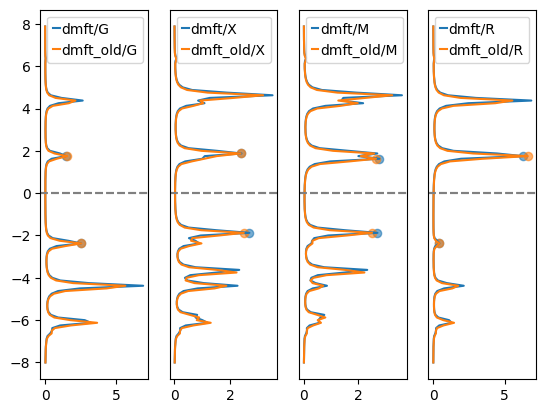

In [2]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(1, 4)
axes = d.ShowDOS('data/dmft/dos_n_Ne128_eta0.10.csv', idx=10, axes=axes)
axes = d.ShowDOS('data/dmft_old/dos_n_Ne128_eta0.10.csv', idx=10, axes=axes)
plt.show()

## Result: DOS

Predict(rf) : 2.082540s
Predict(xgb) : 14.942327s
Predict(lgbm) : 2.526612s
Predict(cat) : 25.938150s


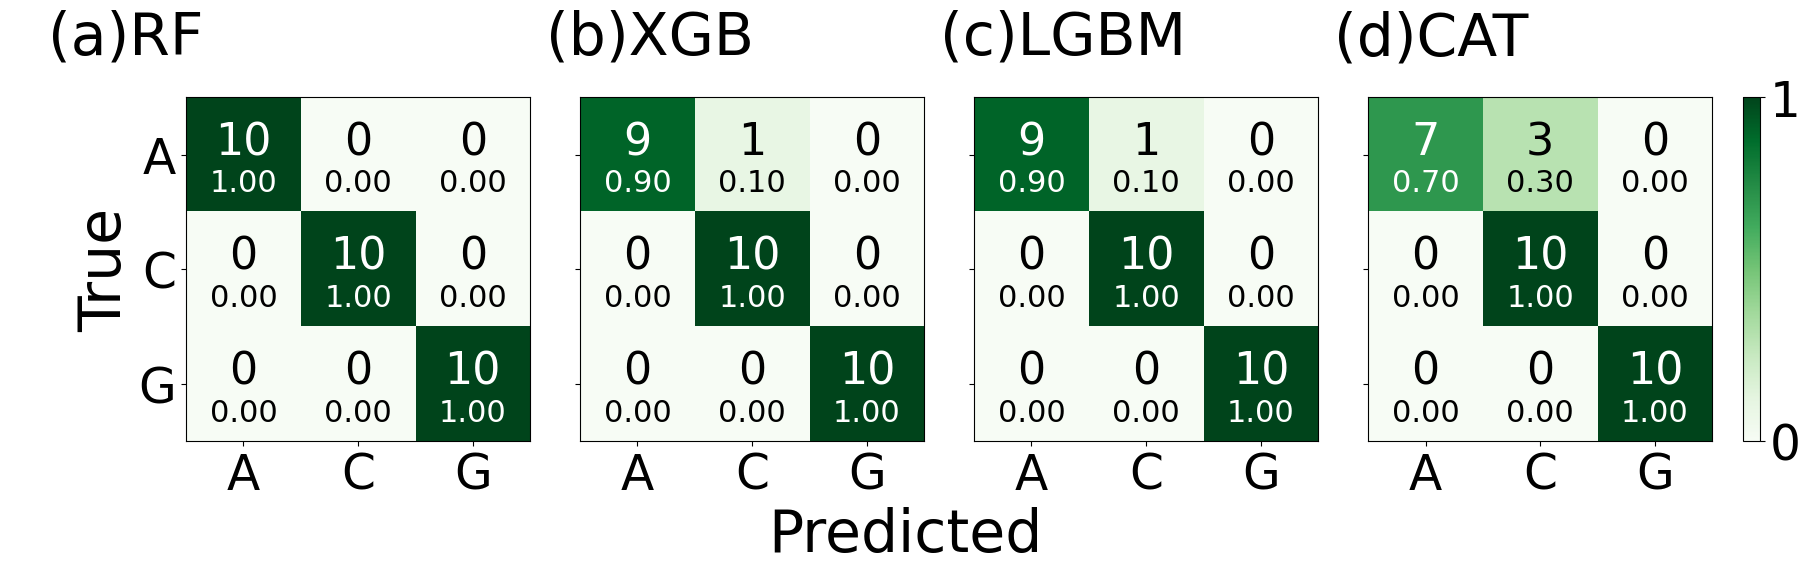

In [2]:
ShowConfs('data/hf/dos_n_Ne128_eta0.10_m0.10.csv', 'data/dmft/dos_n_Ne128_eta0.10.csv')

Predict(rf) : 2.040486s
Predict(xgb) : 14.982908s
Predict(lgbm) : 2.412741s
Predict(cat) : 25.597420s


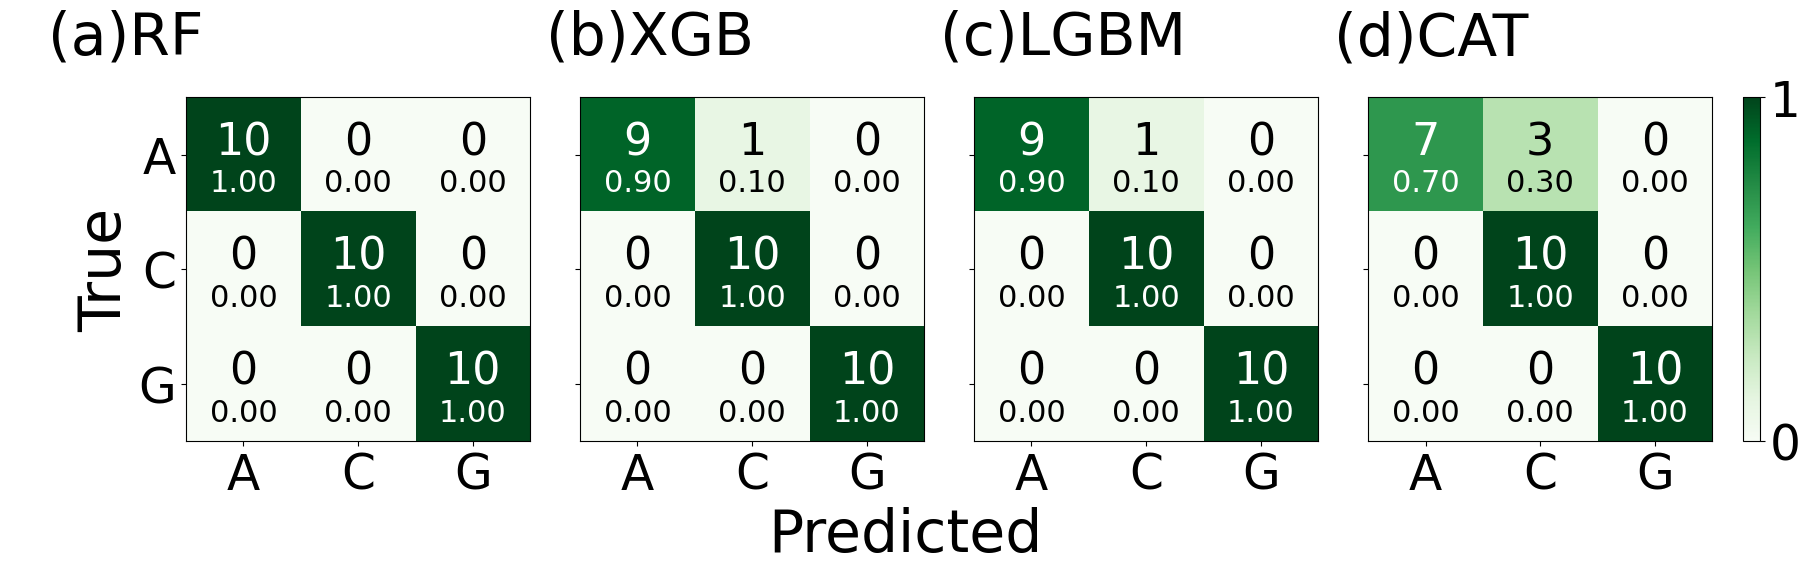

In [3]:
ShowConfs('data/hf/dos_n_Ne128_eta0.10_m0.10.csv', 'data/dmft_old/dos_n_Ne128_eta0.10.csv')

## Result: Peak

Predict(rf) : 0.732161s
Predict(xgb) : 0.558356s
Predict(lgbm) : 0.372979s
Predict(cat) : 4.841298s


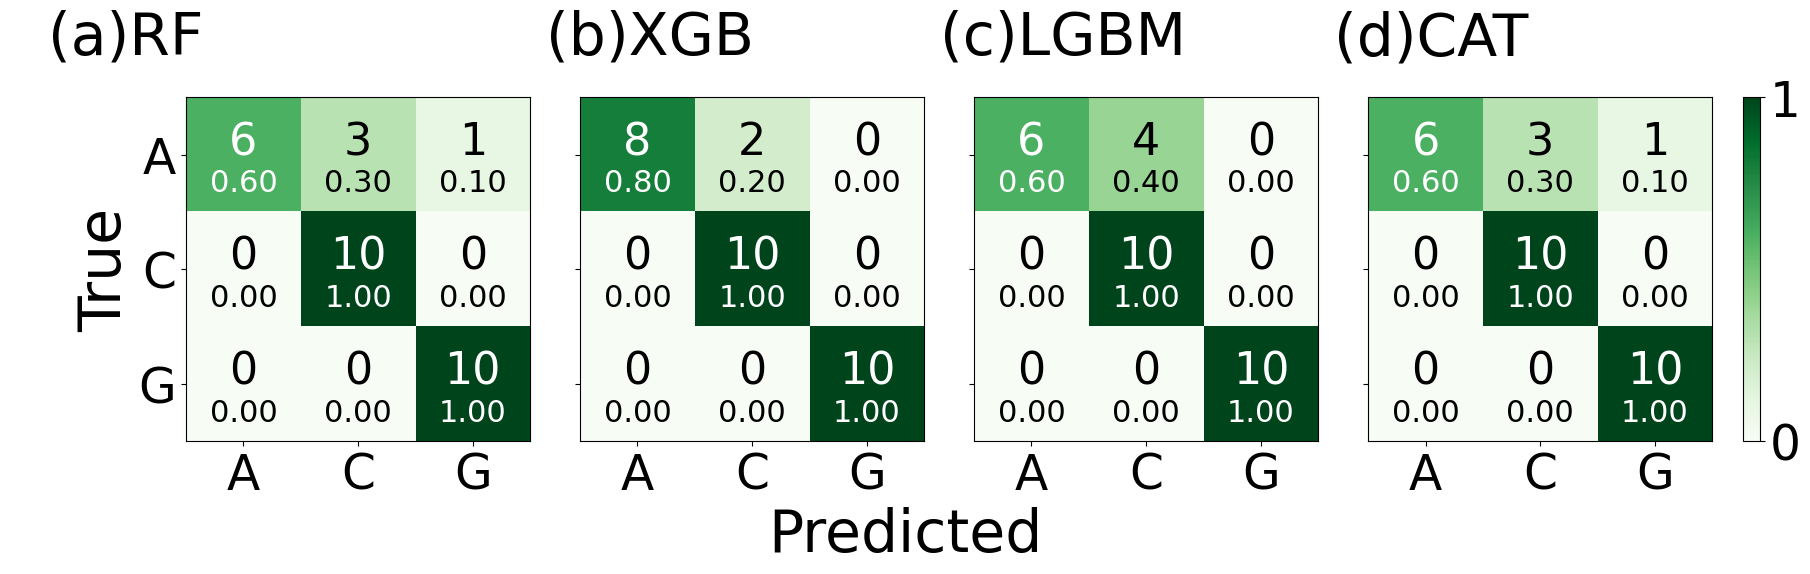

In [3]:
ShowConfs('data/hf/peak_n_Ne128_eta0.10_m0.10.csv', 'data/dmft/peak_n_Ne128_eta0.10.csv')

Predict(rf) : 0.707290s
Predict(xgb) : 0.536990s
Predict(lgbm) : 0.430396s
Predict(cat) : 1.547823s


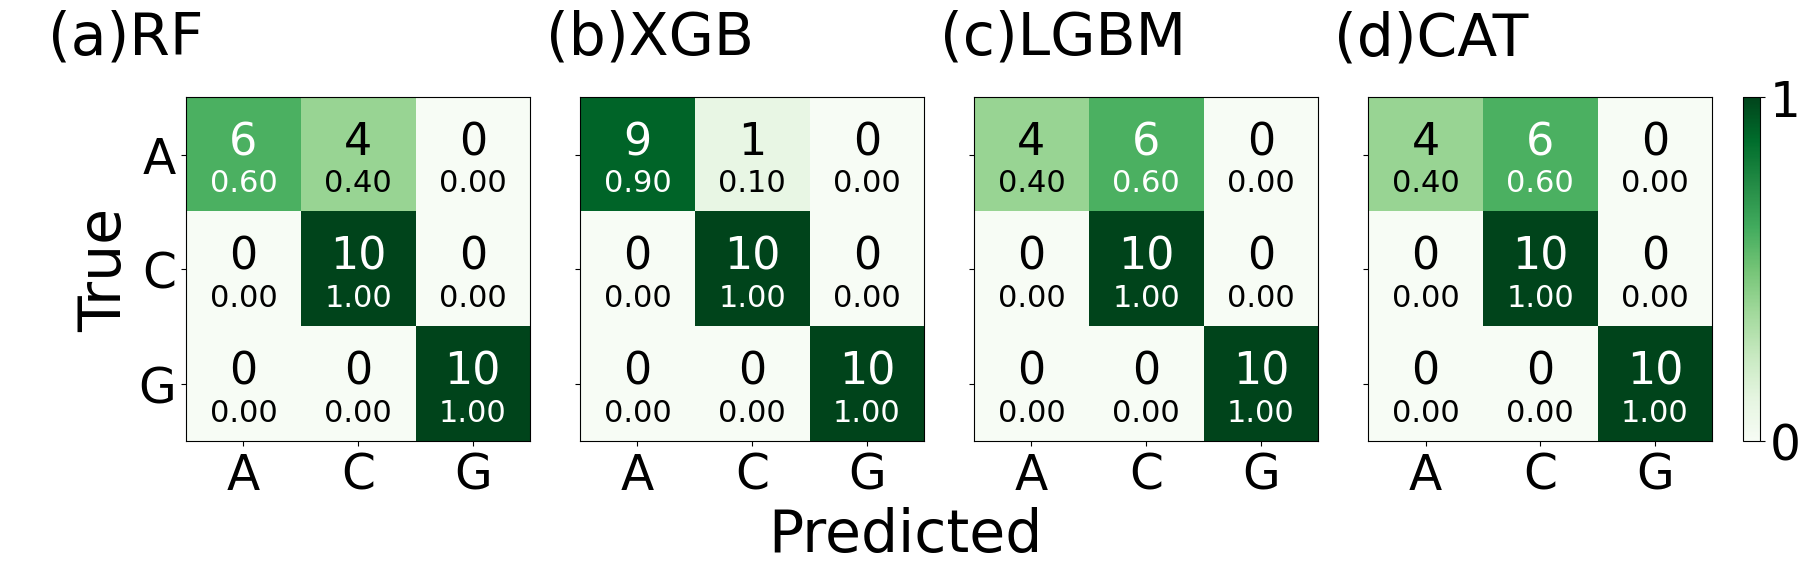

In [7]:
ShowConfs('data/hf/peak_n_Ne128_eta0.10_m0.10.csv', 'data/dmft_old/peak_n_Ne128_eta0.10.csv')